< MNIST 손글씨 인식하기 _ 기본 프레임 설정 >

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [3]:
# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [6]:
# MNIST 데이터 불러오기 및 정규화(normalization)
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0],784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train,10)
Y_test = np_utils.to_categorical(Y_test,10)

In [7]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))  # softmax() : 입력받은 값을 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수 / 다중 클래스 분류 모델을 만들 때 사용

In [8]:
# 모델 실행 환경 설정
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])   # categorical_crossentropy : 교차 엔트로피 계열 중 범주형 교차 엔트로피

In [14]:
# 모델 최적화 설정
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)   # val_loss : 테스트 오차값
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

# 모델 실행
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs = 30, batch_size = 200, verbose = 0, callbacks = [early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" %(model.evaluate(X_test,Y_test)[1]))


Epoch 1: val_loss improved from inf to 0.14746, saving model to ./model\01-0.1475.hdf5

Epoch 2: val_loss improved from 0.14746 to 0.10208, saving model to ./model\02-0.1021.hdf5

Epoch 3: val_loss improved from 0.10208 to 0.08898, saving model to ./model\03-0.0890.hdf5

Epoch 4: val_loss improved from 0.08898 to 0.07876, saving model to ./model\04-0.0788.hdf5

Epoch 5: val_loss improved from 0.07876 to 0.07345, saving model to ./model\05-0.0734.hdf5

Epoch 6: val_loss improved from 0.07345 to 0.06723, saving model to ./model\06-0.0672.hdf5

Epoch 7: val_loss improved from 0.06723 to 0.06509, saving model to ./model\07-0.0651.hdf5

Epoch 8: val_loss improved from 0.06509 to 0.06275, saving model to ./model\08-0.0628.hdf5

Epoch 9: val_loss did not improve from 0.06275

Epoch 10: val_loss improved from 0.06275 to 0.06200, saving model to ./model\10-0.0620.hdf5

Epoch 11: val_loss did not improve from 0.06200

Epoch 12: val_loss did not improve from 0.06200

Epoch 13: val_loss improved 

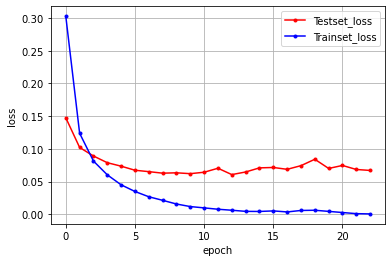

In [17]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

===> 테스트셋의 과적합이 발생하기 전 학습을 끝냈기 때문에 계속해서 테스트셋의 오차가 줄어들고 있음을 확인할 수 있음